<a href="https://colab.research.google.com/github/vsgcap2/colab/blob/main/Stock_px_prediction_tool_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description: this program uses artificial recurrent neural netweork call LSTM (Long Short Term Memory)
#We will use it predict closing stock price of AAPL of using past 60 day stock price

In [2]:
#import libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock quote
#df = web.DataReader('AAPL',data_source='yahoo',start='2012-01-01', end='2021-01-15')

In [8]:
#df.to_csv('aaplData012221.csv', index=False)
#df = pd.read_csv('aaplData012221.csv',date_parser=['Date'])
df = pd.read_csv('aaplData012221.csv')

In [9]:
#Get the number of rows and columns in dataset
df.shape

(2275, 6)

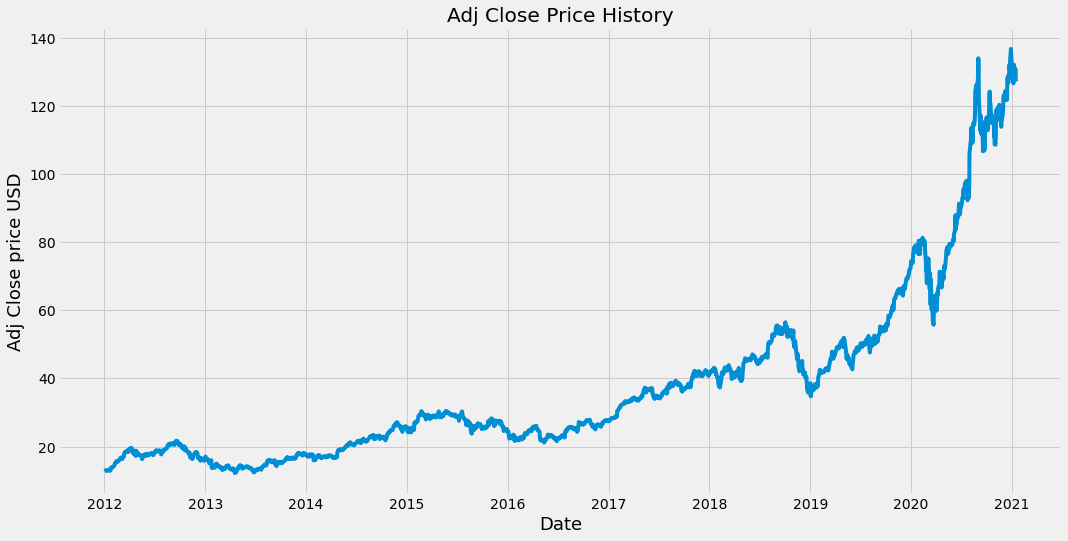

In [11]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price USD',fontsize=18)
plt.show()

In [12]:
#Create a new dataframe with only the 'Adj Close column'
data = df.filter(['Adj Close'])
#convert dataset to numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1820

In [13]:
#Scale the data - why scale - in practice advantageous to apply pre-processing scaling or normalization before presenting to Neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset) 
# computes minimum & max values to be used for scaling - and it transforms the data using those values
scaled_data

array([[0.00369656],
       [0.00424355],
       [0.00537958],
       ...,
       [0.95340637],
       [0.93750031],
       [0.92328119]])

In [14]:
#Create the training dataset
#Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range (60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00369656, 0.00424355, 0.00537958, 0.00646116, 0.00629534,
       0.00666905, 0.00649826, 0.0062112 , 0.00582012, 0.0070304 ,
       0.00812188, 0.00778526, 0.00594141, 0.00770113, 0.00596861,
       0.01246549, 0.01196308, 0.01261894, 0.0140371 , 0.01489594,
       0.01482418, 0.01455935, 0.01568795, 0.01674975, 0.01795257,
       0.01989545, 0.02397677, 0.0240386 , 0.02631068, 0.0280085 ,
       0.02509047, 0.02621412, 0.02619187, 0.02934255, 0.02889456,
       0.02972369, 0.03121363, 0.03204278, 0.03443121, 0.03617105,
       0.0366735 , 0.03684922, 0.03387425, 0.03315649, 0.03326289,
       0.03605968, 0.03684672, 0.03853711, 0.04252188, 0.04783816,
       0.04684328, 0.04684574, 0.05068944, 0.05189222, 0.05103588,
       0.05025382, 0.04943951, 0.05214472, 0.05400095, 0.05477813])]
[0.05285752391573326]

[array([0.00369656, 0.00424355, 0.00537958, 0.00646116, 0.00629534,
       0.00666905, 0.00649826, 0.0062112 , 0.00582012, 0.0070304 ,
       0.00812188, 0.00778526, 0.00

In [15]:
#Convert x_train and y_train to numpy arrays so we can use it in LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)


In [16]:
#Reshape the data (because LSTM model expects 3 dimensional data)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape



(1760, 60, 1)

In [37]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [38]:
model.compile(optimizer='adam', loss ='mean_squared_error')
#optimizer is built to improve upon the loss function, and loss function will tell how well the model did on training

In [39]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1760/1760 [==============================] - 44s 24ms/step - loss: 3.2837e-04


In [40]:
#create testing data set
#create a new array containing scaled values from index 1543 to 2003
test_data = scaled_data [training_data_len - 60: , :]
#Create teh data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60 : i, 0])

In [43]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [44]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [45]:
#Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [46]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test) **2 )
rmse

2.9337493728805373

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


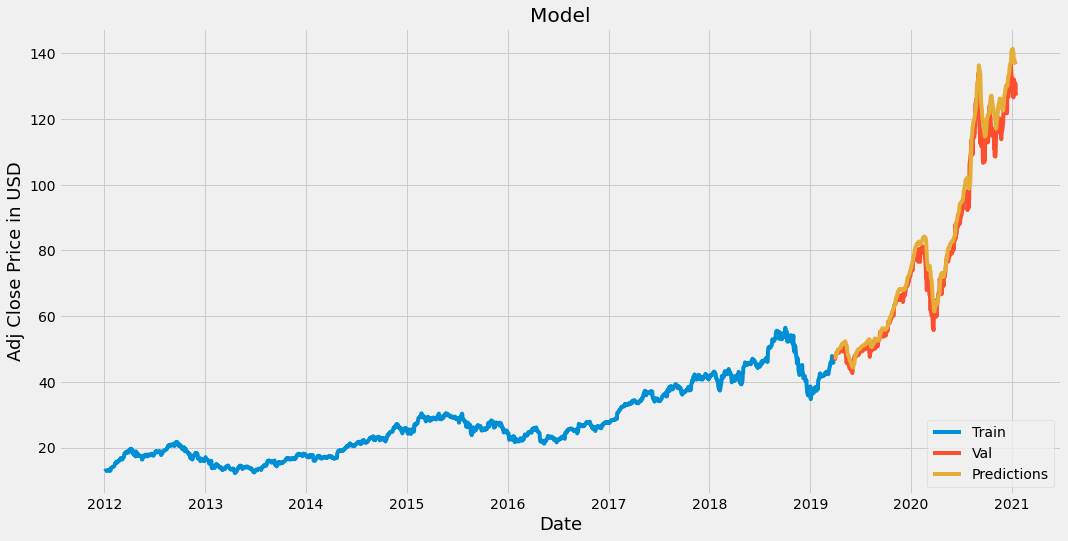

In [48]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel ('Adj Close Price in USD',fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [49]:
#Show the valid and predicted prices
valid

,Adj Close,Predictions
Date,,
2019-03-29,46.582916,47.377605
2019-04-01,46.899277,47.367153
2019-04-02,47.581043,47.433071
2019-04-03,47.907207,47.634293
2019-04-04,47.990585,47.924267
...,...,...
2021-01-11,128.979996,137.772079
2021-01-12,128.800003,137.358734
2021-01-13,130.889999,136.897034


In [51]:
#GEt the quote
df2 = pd.read_csv('AaplData_yhooSrc.csv')
new_df = df2.filter(['Adj Close'])
#get last 60 day closing prices and convert dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
X_test.append(last_60_days_scaled)
#Convert X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[136.1295]]


In [52]:
valid[-60:].head(3)

,Adj Close,Predictions
Date,,
2020-10-21,116.668724,125.735764
2020-10-22,115.550644,124.979942
2020-10-23,114.841873,124.113815
